<a href="https://colab.research.google.com/github/FabioMMaia/Template_Match/blob/main/Template_Match.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/MyDrive/Projeto ML/2023/MatchTemplate')

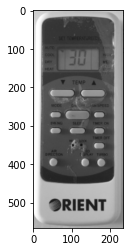

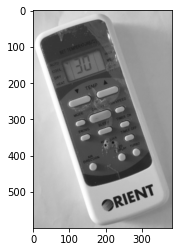

In [9]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img1=mpimg.imread('Captureh.PNG')
plt.imshow(img1)
plt.show()

img2=mpimg.imread('Captureflip.PNG')
plt.imshow(img2)
plt.show()

In [18]:

import cv2
import numpy as np
MIN_MATCH_COUNT = 4

# imgname1 = "box.png"
# imgname2 = "box_in_scene.png"

# ## (1) prepare data
# img1 = cv2.imread(imgname1)
# img2 = cv2.imread(imgname2)

image1_8bit = cv2.normalize(img1, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
image2_8bit = cv2.normalize(img2, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

gray1 = cv2.cvtColor(image1_8bit, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2_8bit, cv2.COLOR_BGR2GRAY)


## (2) Create SIFT object
sift = cv2.xfeatures2d.SIFT_create()

## (3) Create flann matcher
matcher = cv2.FlannBasedMatcher(dict(algorithm = 1, trees = 5), {})

## (4) Detect keypoints and compute keypointer descriptors
kpts1, descs1 = sift.detectAndCompute(gray1,None)
kpts2, descs2 = sift.detectAndCompute(gray2,None)

## (5) knnMatch to get Top2
matches = matcher.knnMatch(descs1, descs2, 2)
# Sort by their distance.
matches = sorted(matches, key = lambda x:x[0].distance)

## (6) Ratio test, to get good matches.
good = [m1 for (m1, m2) in matches if m1.distance < 0.7 * m2.distance]

canvas = image2_8bit.copy()

## (7) find homography matrix
if len(good)>MIN_MATCH_COUNT:
    ## (queryIndex for the small object, trainIndex for the scene )
    src_pts = np.float32([ kpts1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kpts2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    ## find homography matrix in cv2.RANSAC using good match points
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    #matchesMask2 = mask.ravel().tolist()
    h,w = img1.shape[:2]
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)
    cv2.polylines(canvas,[np.int32(dst)],True,(0,255,0),3, cv2.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good),MIN_MATCH_COUNT))


## (8) drawMatches
matched = cv2.drawMatches(image1_8bit,kpts1,canvas,kpts2,good,None)#,**draw_params)

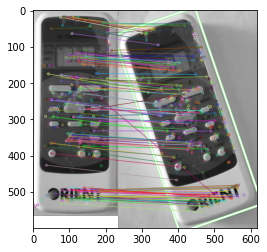

In [20]:
plt.imshow(matched)

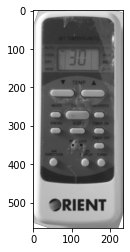

In [22]:
##  Crop the matched region from scene
h,w = img1.shape[:2]
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
dst = cv2.perspectiveTransform(pts,M)
perspectiveM = cv2.getPerspectiveTransform(np.float32(dst),pts)
found = cv2.warpPerspective(img2,perspectiveM,(w,h))
# cv2.imwrite("found.png", found)
plt.imshow(found)

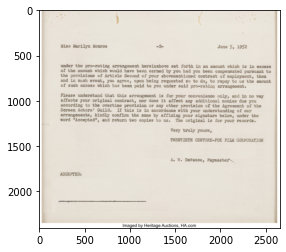

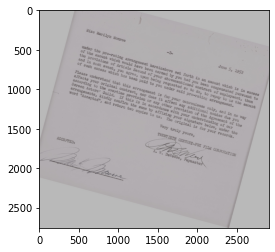

In [24]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img1=mpimg.imread('exemplotmpl.jpg')
plt.imshow(img1)
plt.show()

img2=mpimg.imread('exemploflip2.jpg')
plt.imshow(img2)
plt.show()

In [25]:

import cv2
import numpy as np
MIN_MATCH_COUNT = 4

# imgname1 = "box.png"
# imgname2 = "box_in_scene.png"

# ## (1) prepare data
# img1 = cv2.imread(imgname1)
# img2 = cv2.imread(imgname2)

image1_8bit = cv2.normalize(img1, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
image2_8bit = cv2.normalize(img2, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

gray1 = cv2.cvtColor(image1_8bit, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2_8bit, cv2.COLOR_BGR2GRAY)


## (2) Create SIFT object
sift = cv2.xfeatures2d.SIFT_create()

## (3) Create flann matcher
matcher = cv2.FlannBasedMatcher(dict(algorithm = 1, trees = 5), {})

## (4) Detect keypoints and compute keypointer descriptors
kpts1, descs1 = sift.detectAndCompute(gray1,None)
kpts2, descs2 = sift.detectAndCompute(gray2,None)

## (5) knnMatch to get Top2
matches = matcher.knnMatch(descs1, descs2, 2)
# Sort by their distance.
matches = sorted(matches, key = lambda x:x[0].distance)

## (6) Ratio test, to get good matches.
good = [m1 for (m1, m2) in matches if m1.distance < 0.7 * m2.distance]

canvas = image2_8bit.copy()

## (7) find homography matrix
if len(good)>MIN_MATCH_COUNT:
    ## (queryIndex for the small object, trainIndex for the scene )
    src_pts = np.float32([ kpts1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kpts2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    ## find homography matrix in cv2.RANSAC using good match points
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    #matchesMask2 = mask.ravel().tolist()
    h,w = img1.shape[:2]
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)
    cv2.polylines(canvas,[np.int32(dst)],True,(0,255,0),3, cv2.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good),MIN_MATCH_COUNT))


## (8) drawMatches
matched = cv2.drawMatches(image1_8bit,kpts1,canvas,kpts2,good,None)#,**draw_params)

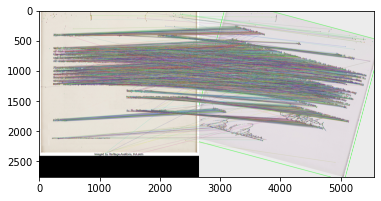

In [26]:
plt.imshow(matched)

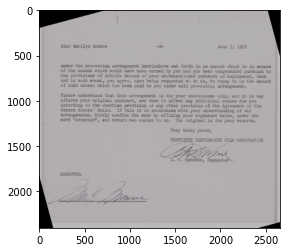

In [27]:
##  Crop the matched region from scene
h,w = img1.shape[:2]
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
dst = cv2.perspectiveTransform(pts,M)
perspectiveM = cv2.getPerspectiveTransform(np.float32(dst),pts)
found = cv2.warpPerspective(img2,perspectiveM,(w,h))
# cv2.imwrite("found.png", found)
plt.imshow(found)

In [33]:
img_clean = cv2.cvtColor(found, cv2.COLOR_BGR2GRAY)  - gray1

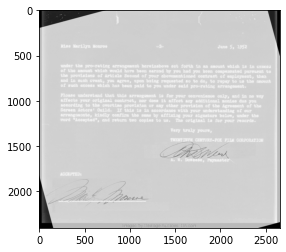

In [34]:
plt.imshow(img_clean, cmap='gray')

In [51]:
ret, thresh1 = cv2.threshold(img_clean, 200, 255, cv2.THRESH_BINARY)

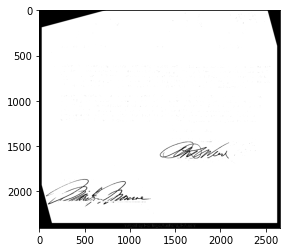

In [52]:
plt.imshow(thresh1, cmap='gray')